/kaggle/input/Admission_Predict.csv


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='WH1y1zxWyebRX9Y18gAgC7oAr9JBJFL8ey8DaIfdhVo4',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'univadmit-donotdelete-pr-gimwwaicqw2pki'
object_key = 'Admission_Predict.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

admission = pd.read_csv(body)
admission.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [50]:
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [51]:
admission.shape 

(400, 9)

In [52]:
admission.columns  

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [53]:
admission.describe() 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [54]:
admission.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [55]:
X=admission.drop(['Serial No.','Chance of Admit '],axis=1)
X.shape

(400, 7)

In [56]:
y=admission['Chance of Admit ']
y.shape

(400,)

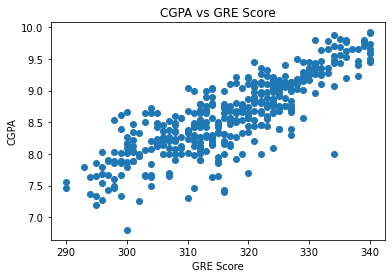

In [57]:
plt.scatter(admission['GRE Score'],admission['CGPA'])
plt.title('CGPA vs GRE Score')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.show()

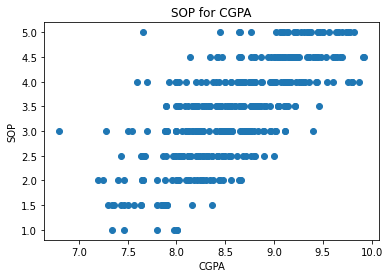

In [58]:
plt.scatter(admission['CGPA'],admission['SOP'])
plt.title('SOP for CGPA')
plt.xlabel('CGPA')
plt.ylabel('SOP')
plt.show()

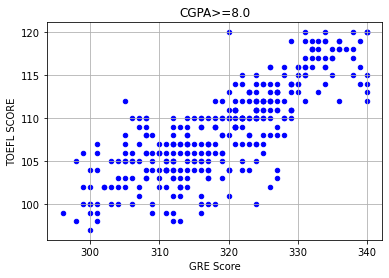

In [59]:
admission[admission.CGPA >= 8.0].plot(kind='scatter', x='GRE Score', y='TOEFL Score',color="BLUE")

plt.xlabel("GRE Score")
plt.ylabel("TOEFL SCORE")
plt.title("CGPA>=8.0")
plt.grid(True)

plt.show()

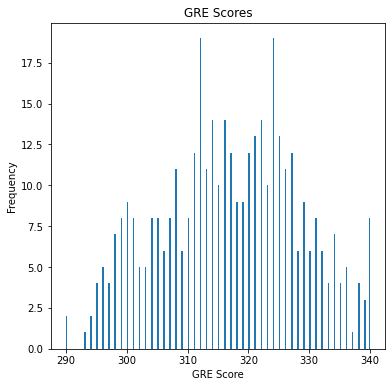

In [60]:
admission["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (6,6))

plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")

plt.show()

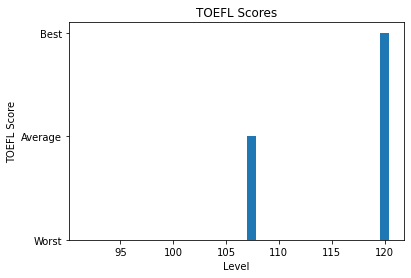

In [61]:

p = np.array([admission["TOEFL Score"].min(),admission["TOEFL Score"].mean(),admission["TOEFL Score"].max()])
r = ["Worst","Average","Best"]
plt.bar(p,r)

plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")

plt.show()

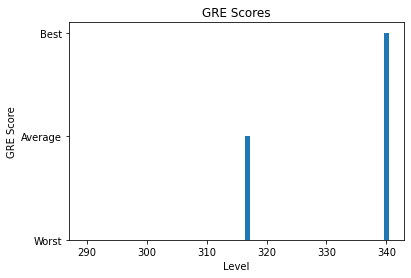

In [62]:

g = np.array([admission["GRE Score"].min(),admission["GRE Score"].mean(),admission["GRE Score"].max()])
h = ["Worst","Average","Best"]
plt.bar(g,h)

plt.title("GRE Scores")
plt.xlabel("Level")
plt.ylabel("GRE Score")

plt.show()

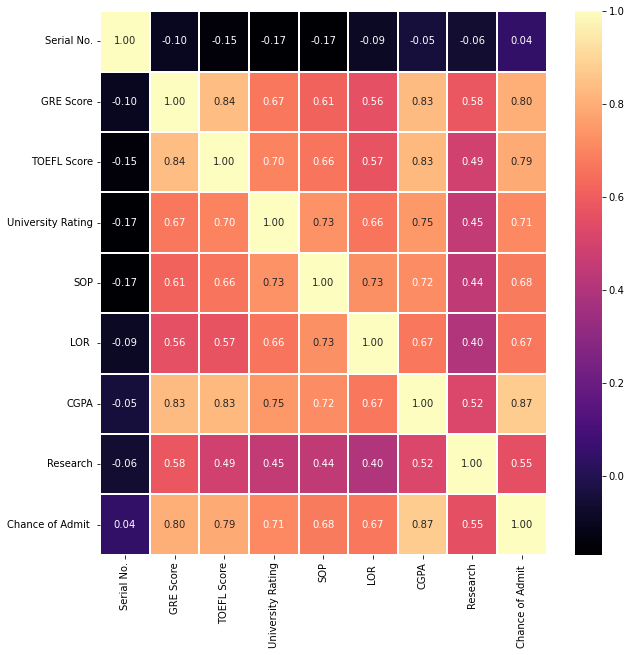

In [63]:
import seaborn as sns

plt.figure(figsize=(10, 10))

sns.heatmap(admission.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")

plt.show()

<AxesSubplot:xlabel='University Rating', ylabel='count'>

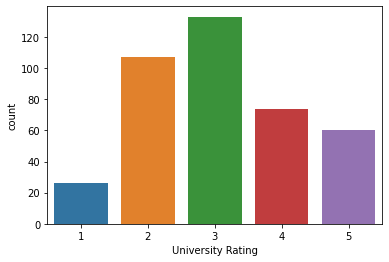

In [64]:
admission.Research.value_counts()

sns.countplot(x="University Rating",data=admission)

<AxesSubplot:xlabel='University Rating', ylabel='count'>

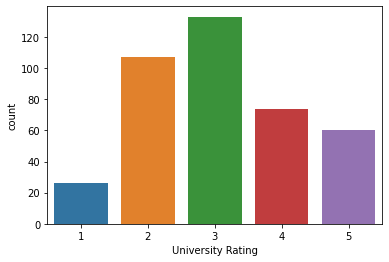

In [65]:
admission.Research.value_counts()

sns.countplot(x="University Rating",data=admission)

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit '>

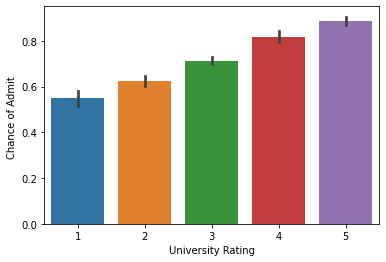

In [66]:
sns.barplot(x="University Rating", y="Chance of Admit ", data=admission)

In [67]:
 
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20) 

In [68]:
X_train.shape

(320, 7)

In [69]:
X_test.shape

(80, 7)

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
310,0.60,0.428571,0.5,0.500,0.625,0.621795,1.0
260,0.74,0.571429,1.0,1.000,0.625,0.746795,1.0
330,0.74,0.750000,0.5,0.625,0.500,0.596154,1.0
132,0.38,0.464286,1.0,0.625,0.625,0.564103,0.0
155,0.44,0.607143,0.5,0.500,0.500,0.605769,0.0


In [71]:
from sklearn.ensemble import RandomForestRegressor
rgr=RandomForestRegressor()
rgr.fit(X_train,y_train)

RandomForestRegressor()

In [72]:
rgr.score(X_test,y_test)

0.7905367721307983

In [73]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [74]:

import xgboost as xgb
xg = xgb.XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=56,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [75]:
xg.score(X_test,y_test)

0.73737345050915

In [76]:
y_predict=rgr.predict(X_test)
y_predict
#Y_test.shape

array([0.7573, 0.8436, 0.6794, 0.8412, 0.9302, 0.9169, 0.7198, 0.5111,
       0.5273, 0.9429, 0.6098, 0.6066, 0.6224, 0.7344, 0.8156, 0.5989,
       0.6294, 0.6162, 0.9044, 0.4879, 0.6199, 0.7667, 0.5973, 0.6986,
       0.7053, 0.7453, 0.653 , 0.6756, 0.7956, 0.8181, 0.8423, 0.779 ,
       0.7554, 0.9338, 0.6089, 0.5187, 0.7301, 0.8035, 0.6736, 0.7962,
       0.7686, 0.5496, 0.9349, 0.7242, 0.8889, 0.8502, 0.8237, 0.711 ,
       0.6185, 0.7838, 0.9428, 0.7005, 0.6615, 0.93  , 0.9179, 0.738 ,
       0.699 , 0.7166, 0.6574, 0.8452, 0.4883, 0.9037, 0.4946, 0.8499,
       0.5354, 0.4776, 0.6463, 0.7462, 0.9589, 0.6731, 0.5533, 0.8749,
       0.7411, 0.664 , 0.8675, 0.9369, 0.7007, 0.6405, 0.6715, 0.422 ])

In [77]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np

print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.04643874999999999
Mean Squared Error: 0.004074108875000005
Root Mean Squared Error: 0.06382874646270287


In [78]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [79]:
lr_model=lr.fit(X_train,y_train)
pred_lr=lr_model.predict(X_test)

In [80]:
lr.score(X_test,y_test)

0.8123922665035088

In [81]:
from sklearn.tree import DecisionTreeRegressor

In [82]:
dr=DecisionTreeRegressor()
dr.fit(X_train,y_train)
dr.score(X_test,y_test)

0.6596442041588508

In [83]:
pip install ibm_watson_machine_learning

Note: you may need to restart the kernel to use updated packages.


In [84]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url" : "https://us-south.ml.cloud.ibm.com",
    "apikey" : "eaHWKSXPtK0m7BuLoSTrywJcns7e7SU4kWkKuHS5Ok1o"
}
client = APIClient(wml_credentials)

In [85]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [86]:
space_uid = guid_from_space_name(client, 'admitpredict')
print("sSpace UID = "+space_uid)

sSpace UID = da1959c6-5f6f-47dc-871b-d701ebd08177


In [87]:
client.set.default_space(space_uid)

'SUCCESS'

In [88]:
client.software_specifications.list(limit=200)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [89]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [90]:
model_details = client.repository.store_model(model = lr, meta_props = {
        client.repository.ModelMetaNames.NAME: "univ_pred",
        client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
        client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
        }
    )
model_id = client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/repository.py:1453: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")
